In [1]:
import pandas as pd

/home/nivedita/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('mbti_1.csv')

In [3]:
df.head(4)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."


In [4]:
df.columns

Index(['type', 'posts'], dtype='object')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
type_count = df['type'].value_counts()

plt.figure(figsize=(16,9))
sns.barplot(type_count.index, type_count.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type of person', fontsize=12)
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1600x900 with 0 Axes>

In [6]:
##any missing value?
df.isnull().sum()

type     0
posts    0
dtype: int64

In [7]:
import random
import nltk,re,string
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def combine_text(text):
    return ' '.join(text)

def text_preprocessing(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    no_punc = clean_text(text)
    tokenized_text = tokenizer.tokenize(no_punc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = combine_text(remove_stopwords)
    
    return combined_text

In [9]:
import nltk

# Download the stopwords
nltk.download('stopwords')

# Import stopwords
from nltk.corpus import stopwords

# Check if the stopwords are available
stop_words = set(stopwords.words('english'))
print("Stopwords downloaded successfully!")


Stopwords downloaded successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nivedita/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
df['clean_posts'] = df['posts'].apply(lambda x: text_preprocessing(x))


In [11]:
mbti = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 
        'S':'Sensing', 'T':'Thinking', 'F': 'Feeling', 
        'J':'Judging', 'P': 'Perceiving'}
df['description'] = df.type.apply(lambda x:' '.join([mbti[l] for l in list(x)]))
df['clean_text_length'] = df.clean_posts.apply(lambda x:len(x))

In [13]:
from wordcloud import WordCloud
def Word_Cloud(dataset , category):
    fig , ax1 = plt.subplots(1 , 1 , figsize = [26,8])
    dx = dataset[dataset.type == category]['clean_posts']
    wordcloud1 = WordCloud(background_color = 'white' , width = 600 , height = 400).generate(" ".join(dx))
    ax1.imshow(wordcloud1)
    ax1.axis('off')
    ax1.set_title('Wordcloud for posts '+ category , fontsize = 20)

In [14]:
types = df.type.unique()
type_plot = types[1:4]
type_plot

array(['ENTP', 'INTP', 'INTJ'], dtype=object)

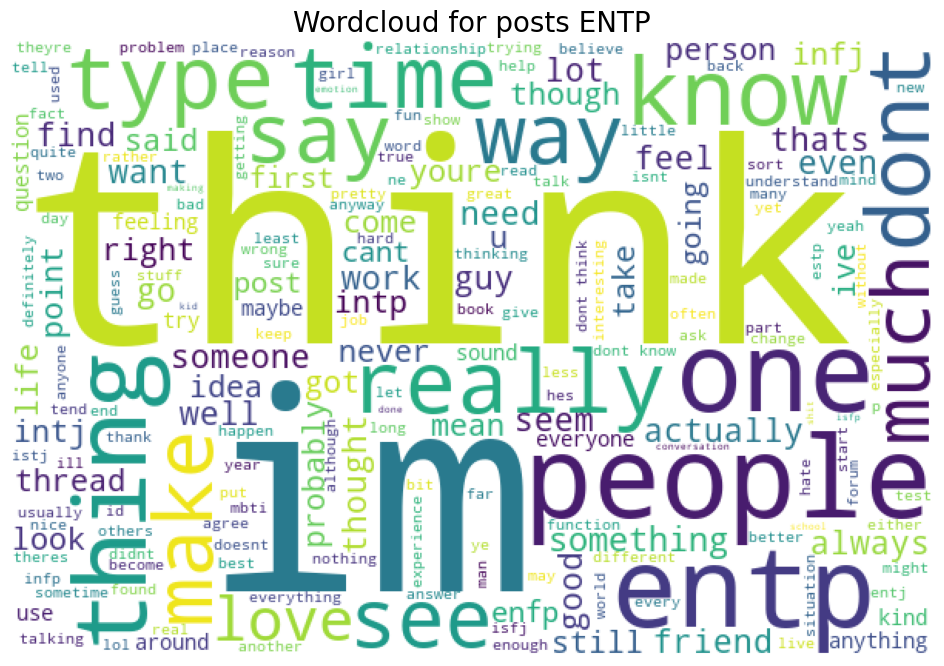

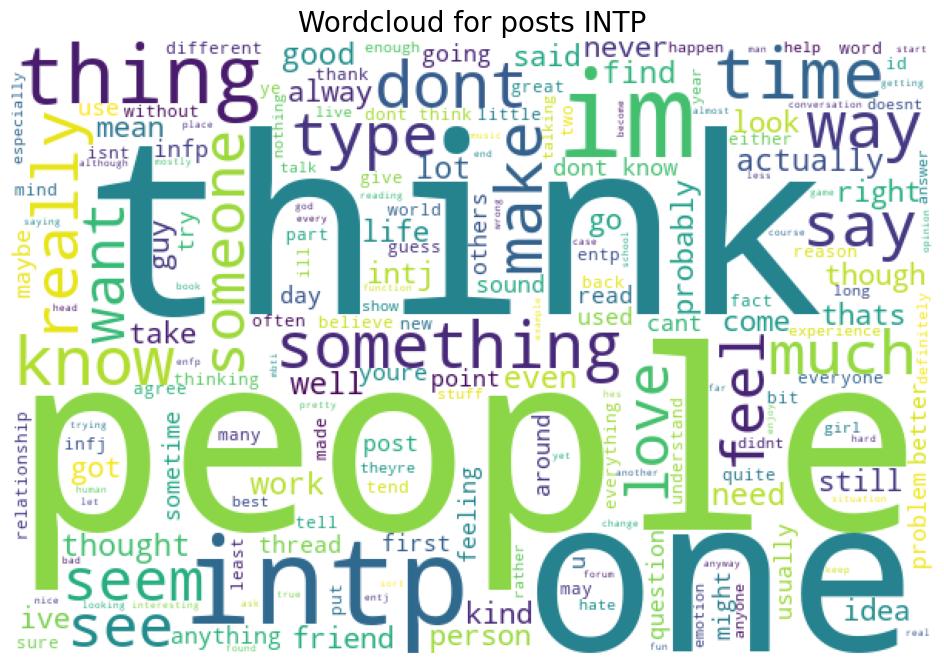

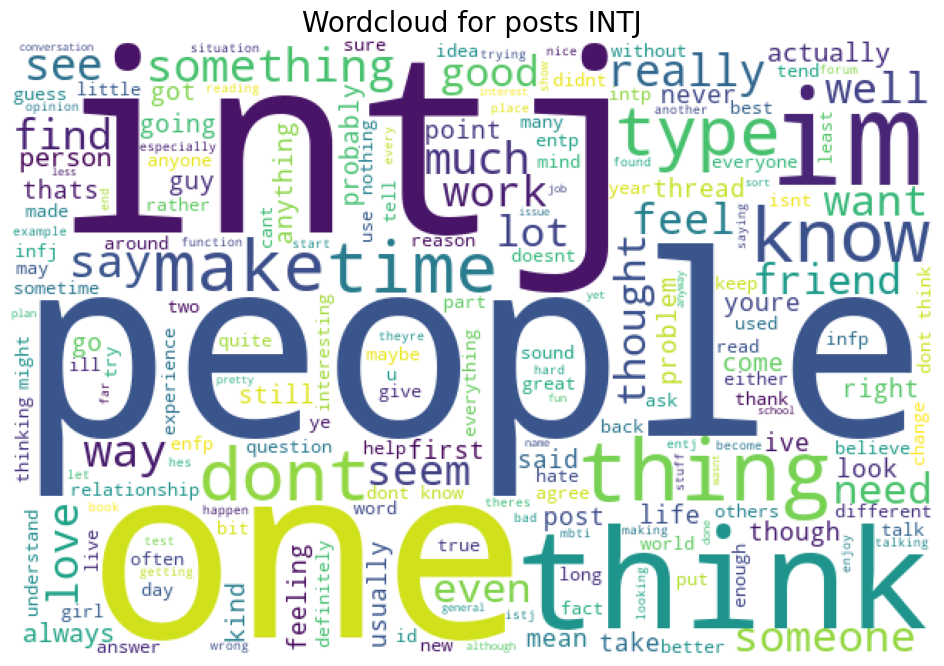

In [15]:
for i in type_plot:
    Word_Cloud(df,i)

In [16]:
from sklearn.preprocessing import LabelEncoder
dx = df[['clean_posts','type']]
encoder = LabelEncoder()
dx['type_enc'] = encoder.fit_transform(dx.type)
dx.head()

/tmp/ipykernel_22110/2234671495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['type_enc'] = encoder.fit_transform(dx.type)


,clean_posts,type,type_enc
0,intj moments sportscenter top ten plays pranks...,INFJ,8
1,im finding lack posts alarmingsex boring posit...,ENTP,3
2,good one course say know thats blessing cursed...,INTP,11
3,dear intp enjoyed conversation day esoteric ga...,INTJ,10
4,youre firedthats another silly misconception a...,ENTJ,2


In [17]:
category = list(encoder.classes_)

In [18]:
train_data = dx.iloc[:6940,:]
test_data = dx.iloc[6940:,]
train_data.shape,test_data.shape

((6940, 3), (1735, 3))

In [19]:
train_data.isnull().sum()

clean_posts    0
type           0
type_enc       0
dtype: int64

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train_data.clean_posts)
test_vectors = count_vectorizer.transform(test_data.clean_posts)

In [21]:
tfidf_vectorizer = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range = (1 , 2))
train_tfidf = tfidf_vectorizer.fit_transform(train_data.clean_posts)
test_tfidf = tfidf_vectorizer.transform(test_data.clean_posts)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight='balanced' , C = 0.005)
score =cross_val_score(clf , train_vectors , train_data['type_enc'] , cv = 5 , scoring = 'f1_micro')
score

/home/nivedita/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nivedita/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

array([0.620317  , 0.6426513 , 0.63688761, 0.64769452, 0.63544669])

In [23]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(max_depth = 7 , n_estimators = 200 , colsample_bytree = 0.8 , subsample = 0.8 , nthread = 10 , learning_rate = 0.1)
scores = cross_val_score(clf_xgb , train_vectors , train_data['type_enc'] , cv = 5 , scoring = 'f1_micro')
scores

array([0.64048991, 0.66354467, 0.65345821, 0.66354467, 0.63256484])

In [24]:
clf_xgb.fit(train_vectors , train_data.type_enc)
y_pred = clf_xgb.predict(test_vectors)
y_test = test_data.type_enc
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6530259365994237

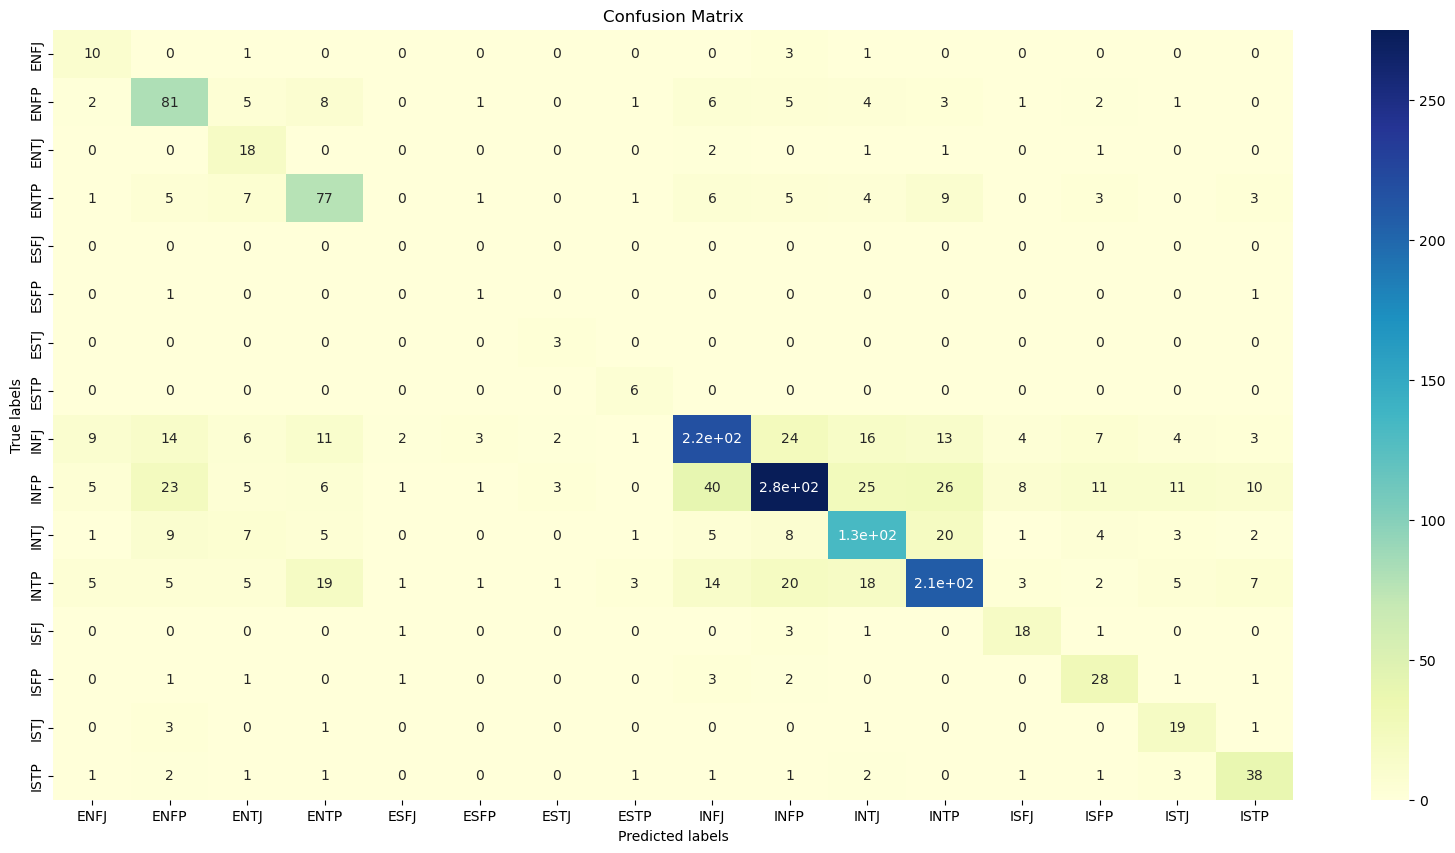

In [25]:
from sklearn.metrics import confusion_matrix
clf_xgb.predict(test_vectors)
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize = (20,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(category); ax.yaxis.set_ticklabels(category);


In [29]:
pwd

'/home/nivedita/Documents/Article_Github_and_Medium/NLP_Mayer/Natural_Language_Procession_Project-Personality-prediction-using-NLP-main'